# Effects of User Attributes on Their Trip Durations
## by Muhammad Ghazal

## Investigation Overview

In this investigation, I wanted to look at the attributes of users that could be used to predict their trip durations. The main focus was on member_gender, user_type and bike_share_for_all_trip.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_share = pd.read_csv('201902-fordgobike-tripdata.csv')

## Distribution of Trip Durations

Trip durations in the dataset take on a large range of values, from about 80 seconds at the lowest, to about 8000 seconds at the highest. Plotted on a logarithmic scale, the distribution of trip durations takes on a normal distribution.

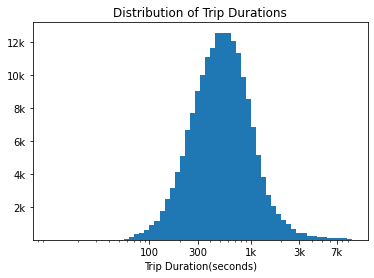

In [6]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10 ** np.arange(1, 4.05, 0.05)
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 7000], [100, 300, '1k', '3k', '7k'])
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3, 12e3], ['2k', '4k', '6k', '8k', '10k', '12k'])
plt.xlabel("Trip Duration(seconds)")
plt.title("Distribution of Trip Durations");

## Distribution of User Types

User Types are: 
- Subscriber who subscribed in bike share service
- Customer (Casual) who used bike share service in few times
Most of users are subscribers and they are about 160k subscribers, while few of them are customers and they are about 20k customers.

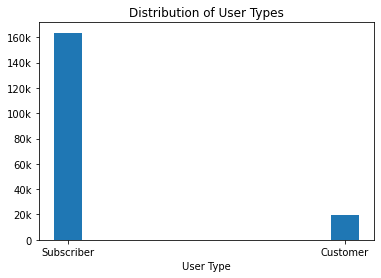

In [10]:
values = bike_share.user_type.value_counts().values
x = [1, 2]
plt.bar(x, values, width=0.1)
plt.xticks(x, ['Subscriber', 'Customer'])
yticks = [0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4, 16e4]
yticklabels = [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k']
plt.yticks(yticks, yticklabels)
plt.xlabel("User Type")
plt.title("Distribution of User Types");

## Distribution of Member Genders

Member genders are:
- Males who are boys and men
- Females who are girls and women
- Others

Most of users are males and they are about 130k users, while some of them are females and they are about 40k users and few of them are others and they are about few thousands.

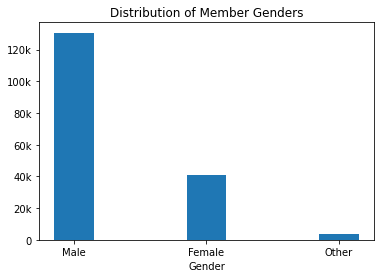

In [14]:
values = bike_share.member_gender.value_counts().values
x = [0, 1, 2]
plt.bar(x, values, width=0.3)
xticklabels=["Male", "Female", "Other"]
plt.xticks(x, xticklabels)
yticks = [0, 20000, 40000, 60000, 80000, 100000, 120000]
yticklabels = [0, '20k', '40k', '60k', '80k', '100k', '120k']
plt.yticks(yticks, yticklabels)
plt.xlabel("Gender")
plt.title("Distribution of Member Genders");

## Distribution of users that have discounting amount of trips and who don't have
bike share for all trip is a discounting amount of trips for users who are in different external programs such as CalFresh which is a welfare program for low individual incomes. Most of users don't subscribe in that program, they are about 160k users while few of them are in that program and they are about 20k users.

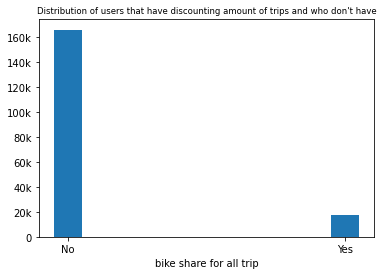

In [28]:
values = bike_share.bike_share_for_all_trip.value_counts().values
x = [0, 1]
plt.bar(x, values, width=0.1)
yticks = [0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4, 16e4]
yticklabels = [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k']
xticklabels = ['No', 'Yes']
plt.yticks(yticks, yticklabels)
plt.xticks(x, xticklabels)
plt.xlabel("bike share for all trip")
plt.title("Distribution of users that have discounting amount of trips and who don't have", fontsize=8.5);

## User Types vs Trip Durations
Plotting Trip Durations on a logarithmic scale. We realized that the median of durations for customers which is about 1k seconds is higher than the median for subscribers which is about 500 seconds.

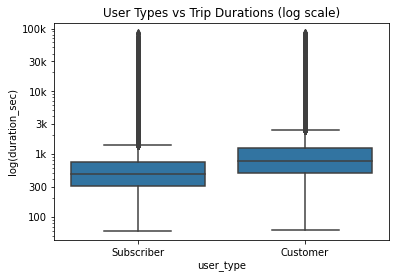

In [31]:
base_color = sb.color_palette()[0]
base_order = ['Subscriber', 'Customer']
sb.boxplot(x = 'user_type', y = 'duration_sec', data=bike_share, order=base_order, color=base_color)
plt.yscale('log')
yticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
yticklabels = [100, 300, '1k', '3k', '10k', '30k', '100k']
plt.yticks(yticks, yticklabels)
plt.ylabel("log(duration_sec)")
plt.title("User Types vs Trip Durations (log scale)");

## Bike_Share_for_All_Trip vs Trip Durations
We realize that subscribers in bike share for all trip have lower trip durations in average than who aren't subscribers in bike share for all trips

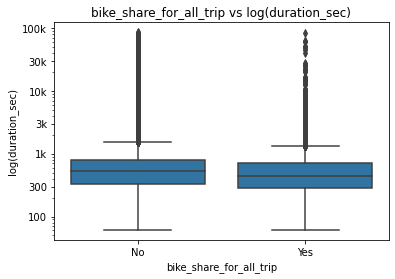

In [44]:
base_order = ['No', 'Yes']
sb.boxplot(x='bike_share_for_all_trip', y='duration_sec', data=bike_share, order=base_order, color=base_color)
plt.yscale('log')
yticks=[100, 300, 1000, 3000, 10000, 30000, 100000]
yticklabels = [100, 300, '1k', '3k', '10k', '30k', '100k']
plt.yticks(yticks, yticklabels)
plt.ylabel('log(duration_sec)')
plt.title("bike_share_for_all_trip vs log(duration_sec)");

## Trip Duration by Member Gender for User Type
We can see how user types and member genders affect trip duration (log scale). The medians of durations for customer users which are about 1000 seconds are higher than the medians for subscribers which are about 500 seconds, which mean that the trip durations for customers are longer than for subscribers.

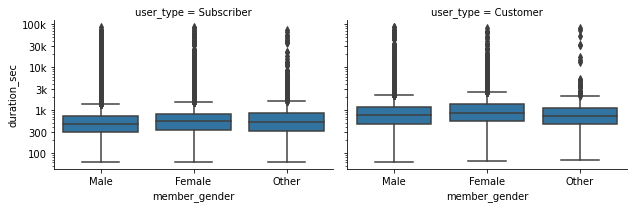

In [39]:
g = sb.FacetGrid(data=bike_share, col='user_type', col_order=['Subscriber', 'Customer'], aspect=1.5)
g.map(sb.boxplot, 'member_gender', 'duration_sec', order=['Male', 'Female', 'Other'])
g.set(yscale='log')
yticks=[100, 300, 1000, 3000, 10000, 30000, 100000]
yticklabels = [100, 300, '1k', '3k', '10k', '30k', '100k']
g.set(yticks=yticks, yticklabels=yticklabels);

## Trip Durations by bike_share_for_all_trips for User Type
Customers who don't subscribe in bike share for all trips their median of durations (log scale) which is about 1000 seconds is higher than the median for subscribers who don't subscribe in bike share for all trips. No customers are subscribers in this program (bike share for all trips).

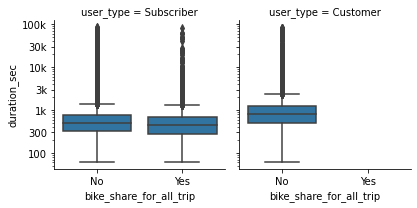

In [41]:
g = sb.FacetGrid(data=bike_share, col='user_type', col_order=['Subscriber', 'Customer'])
g.map(sb.boxplot, 'bike_share_for_all_trip', 'duration_sec', order=['No', 'Yes'])
g.set(yscale='log')
yticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
yticklabels = [100, 300, '1k', '3k', '10k', '30k', '100k']
g.set(yticks=yticks, yticklabels=yticklabels);